## Read/check HRES_POST Data

This script validates postprocessing for HRES data, including checking original data, preprocessing steps, and ensuring data integrity.

In [15]:
# import libraries and directories
from py_env_hpc import *

### 1. Check the postprocessed HRES data in `HRES_DUMP3`

- Check the values, time, and number of steps (e.g. 91)


In [27]:
file=sorted(os.listdir(HRES_DUMP2))[0]
print(file)
data = xr.open_dataset(HRES_DUMP2+"/"+file)
data
#data["tp"][:, 100, 100].values
data["pr"][:, 100, 100].time
#data["tp"][:, 100, 100].values.shape

#print("OK")

ADAPTER_DE05.day01.merged.20180101.nc


<xarray.DataArray 'time' (time: 11)>
array(['2018-01-01T13:00:00.000000000', '2018-01-01T14:00:00.000000000',
       '2018-01-01T15:00:00.000000000', '2018-01-01T16:00:00.000000000',
       '2018-01-01T17:00:00.000000000', '2018-01-01T18:00:00.000000000',
       '2018-01-01T19:00:00.000000000', '2018-01-01T20:00:00.000000000',
       '2018-01-01T21:00:00.000000000', '2018-01-01T22:00:00.000000000',
       '2018-01-01T23:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time       (time) datetime64[ns] 2018-01-01T13:00:00 ... 2018-01-01T23:00:00
    longitude  float32 8.9
    latitude   float32 46.5
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T

### 2. Check the postprocessed HRES data in `HRES_POST`

- Check the values, time, and number of steps (e.g. 91)
- Compare with files in `HRES_OR`.


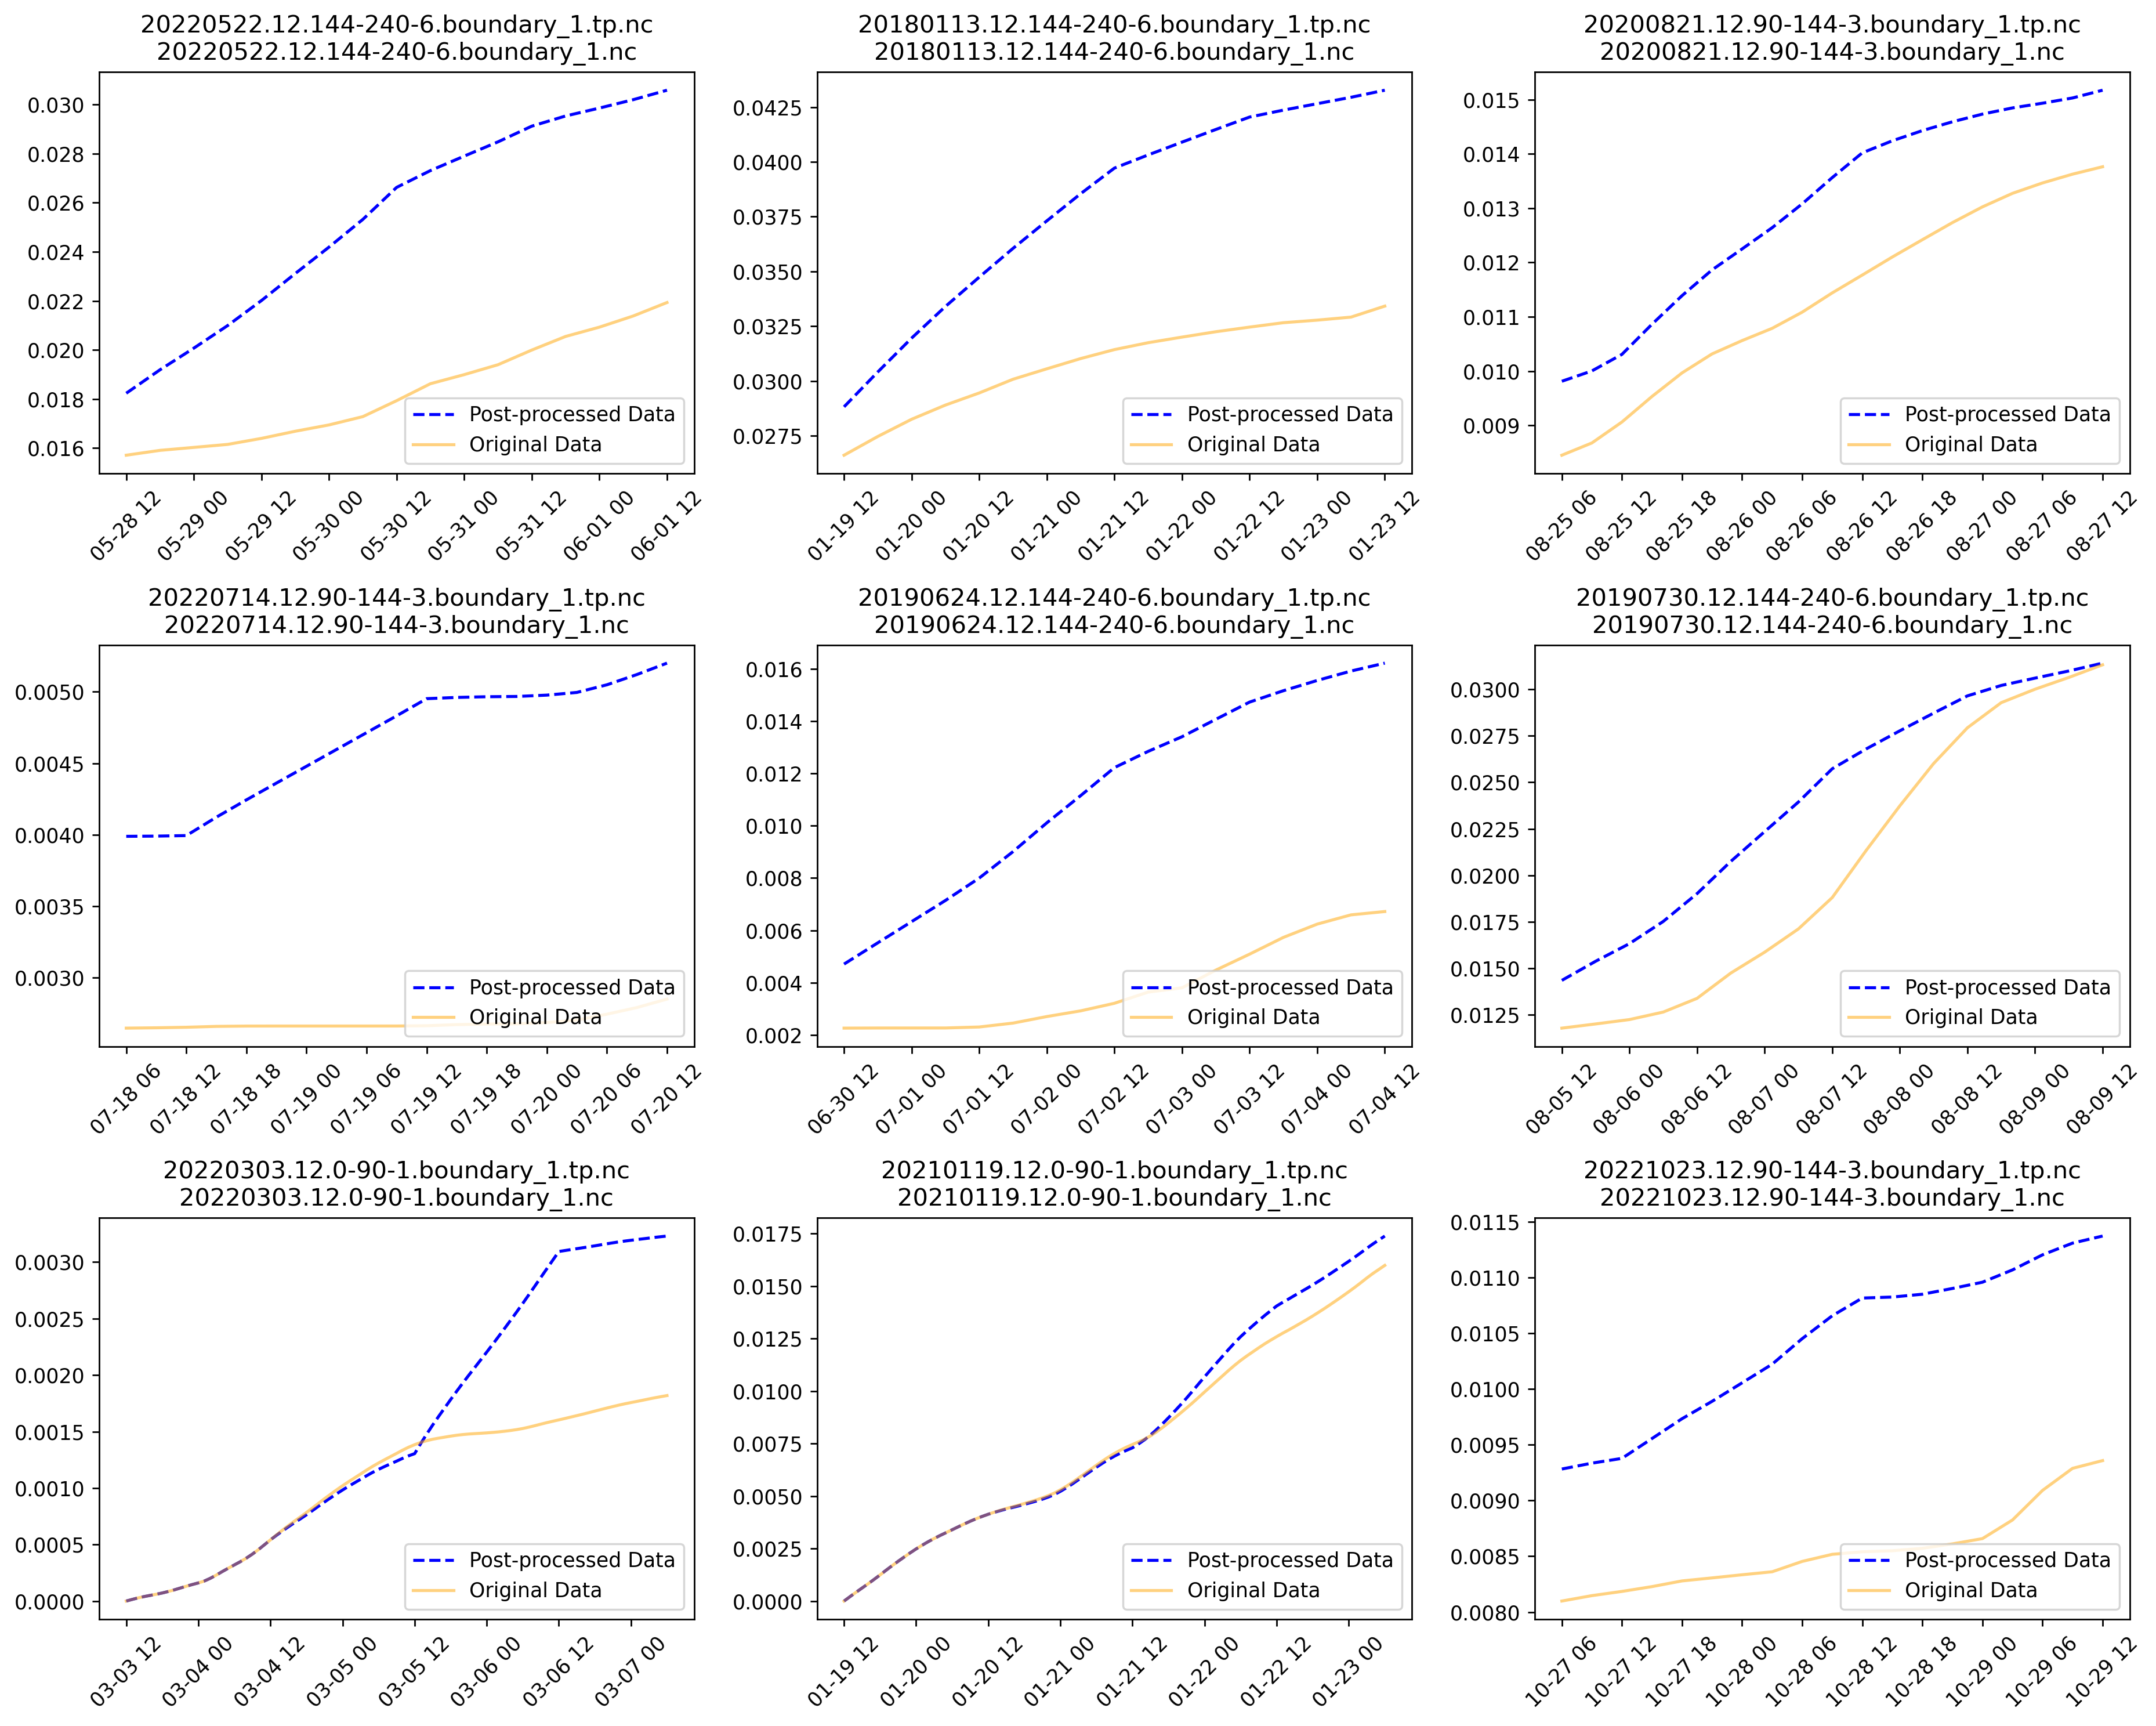

In [16]:
import random
import os
import xarray as xr
import matplotlib.pyplot as plt

# List files
files_post = sorted(os.listdir(HRES_POST))
files_or = sorted(os.listdir(HRES_OR))

# Take 9 random files from HRES_POST
random_files_post = random.sample(files_post, 9)

# Find equivalent files in HRES_OR
random_files_or = [file.replace('.tp.nc', '.nc') for file in random_files_post]

# Initialize plot
fig, axs = plt.subplots(3, 3, figsize=(15,12), dpi=250)

# Loop through random files and plot
for i, (file_post, file_or) in enumerate(zip(random_files_post, random_files_or)):
    # Read data
    data_post = xr.open_dataset(os.path.join(HRES_POST, file_post))
    data_or = xr.open_dataset(os.path.join(HRES_OR, file_or))
    
    # Calculate areal average over time
    areal_avg_data_post = data_post["tp"].mean(dim=['longitude', 'latitude'])
    areal_avg_data_or = data_or["tp"].mean(dim=['longitude', 'latitude'])
    
    # Plot
    ax = axs[i // 3, i % 3]
    ax.plot(areal_avg_data_post['time'], areal_avg_data_post, label='Post-processed Data', color='blue', ls='--', alpha=1)
    ax.plot(areal_avg_data_or['time'], areal_avg_data_or, label='Original Data', color='orange', alpha=0.5)
    ax.set_title(f"{file_post[13:]}\n{file_or[13:]}")
    ax.legend(loc="lower right")
    ax.tick_params(axis='x', rotation=45)

# Show plot
plt.tight_layout()
plt.show()


In [31]:
len(files_post)

6345

In [32]:
len(files_or)

6573

In [28]:
B = files_or[13]
B

'ADAPTER_DE05_20180105.12.144-240-6.boundary_1.nc'

In [27]:
A = files_post[11]
A

'ADAPTER_DE05_20180105.12.144-240-6.boundary_1.tp.nc'

In [29]:
data_or = xr.open_dataset(os.path.join(HRES_OR, B))
data_or.time

<xarray.DataArray 'time' (time: 17)> Size: 136B
array(['2018-01-11T12:00:00.000000000', '2018-01-11T18:00:00.000000000',
       '2018-01-12T00:00:00.000000000', '2018-01-12T06:00:00.000000000',
       '2018-01-12T12:00:00.000000000', '2018-01-12T18:00:00.000000000',
       '2018-01-13T00:00:00.000000000', '2018-01-13T06:00:00.000000000',
       '2018-01-13T12:00:00.000000000', '2018-01-13T18:00:00.000000000',
       '2018-01-14T00:00:00.000000000', '2018-01-14T06:00:00.000000000',
       '2018-01-14T12:00:00.000000000', '2018-01-14T18:00:00.000000000',
       '2018-01-15T00:00:00.000000000', '2018-01-15T06:00:00.000000000',
       '2018-01-15T12:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 136B 2018-01-11T12:00:00 ... 2018-01-15T12...
Attributes:
    long_name:  time

In [30]:
data_post = xr.open_dataset(os.path.join(HRES_POST, A))
data_post.time

<xarray.DataArray 'time' (time: 17)> Size: 136B
array(['2018-01-11T12:00:00.000000000', '2018-01-11T18:00:00.000000000',
       '2018-01-12T00:00:00.000000000', '2018-01-12T06:00:00.000000000',
       '2018-01-12T12:00:00.000000000', '2018-01-12T18:00:00.000000000',
       '2018-01-13T00:00:00.000000000', '2018-01-13T06:00:00.000000000',
       '2018-01-13T12:00:00.000000000', '2018-01-13T18:00:00.000000000',
       '2018-01-14T00:00:00.000000000', '2018-01-14T06:00:00.000000000',
       '2018-01-14T12:00:00.000000000', '2018-01-14T18:00:00.000000000',
       '2018-01-15T00:00:00.000000000', '2018-01-15T06:00:00.000000000',
       '2018-01-15T12:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 136B 2018-01-11T12:00:00 ... 2018-01-15T12...
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T